In [12]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('nneutral')
    scalar.append('ncharged')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('p_jet')
    scalar.append('nneutral_g')
    scalar.append('ncharged_g')
    scalar.append('pt_jet_g')
    scalar.append('eta_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('p_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('phi_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/105.root"] #beta = 2.0
b = getData(files)


Processed $HOME/EIC/output/105.root in 273.5 seconds


In [4]:
files = ["$HOME/EIC/output/102.root"]
c = getData(files)


Processed $HOME/EIC/output/102.root in 184.0 seconds


In [5]:
b.eval('mult = nneutral + ncharged', inplace=True)
b.eval('mult_g = nneutral_g + ncharged_g', inplace=True)
d = applyCut(b, 'Q2 > 10', 'Q2 > 10')
d = applyCut(d, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'p_jet > 5', 'p_jet > 5')

Q2 > 10 3982888  fraction kept: 11.0
0.1 < y < 0.85 2277556  fraction kept: 57.2
W2 > 4 2277556  fraction kept: 100.0
p_jet > 5 558256  fraction kept: 24.5


In [6]:
c.eval('mult = nneutral + ncharged', inplace=True)
c.eval('mult_g = nneutral_g + ncharged_g', inplace=True)
e = applyCut(c, 'Q2 > 10', 'Q2 > 10')
e = applyCut(e, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
e = applyCut(e, 'W2 > 4', 'W2 > 4')
e = applyCut(e, 'p_jet > 5', 'p_jet > 5')

Q2 > 10 3982888  fraction kept: 11.0
0.1 < y < 0.85 2277556  fraction kept: 57.2
W2 > 4 2277556  fraction kept: 100.0
p_jet > 5 558256  fraction kept: 24.5


In [28]:
etaedges = [-4.5, 4.5]
ptedges = toArrayFloat(0, 1.55, 0, log=True, logNum=11)
d1 = partitionEtaPt(d, etaedges, ptedges)
e1 = partitionEtaPt(e, etaedges, ptedges)


-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 558256  fraction kept: 100.0
1.0 < pt_jet < 1.428893958511103 66504  fraction kept: 11.9
1.428893958511103 < pt_jet < 2.041737944669529 46934  fraction kept: 8.4
2.041737944669529 < pt_jet < 2.9174270140011664 45852  fraction kept: 8.2
2.9174270140011664 < pt_jet < 4.168693834703354 55878  fraction kept: 10.0
4.168693834703354 < pt_jet < 5.956621435290105 73366  fraction kept: 13.1
5.956621435290105 < pt_jet < 8.511380382023763 48906  fraction kept: 8.8
8.511380382023763 < pt_jet < 12.161860006463678 22243  fraction kept: 4.0
12.161860006463678 < pt_jet < 17.378008287493753 8389  fraction kept: 1.5
17.378008287493753 < pt_jet < 24.831331052955704 2235  fraction kept: 0.4
24.831331052955704 < pt_jet < 35.48133892335755 216  fraction kept: 0.0

-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 558256  fraction kept: 100.0
1.0 < pt_jet < 1.428893958511103 66504  fraction kept: 11.9
1.428893958511103 < pt_jet < 2.041737944669529 46934  fraction kept: 

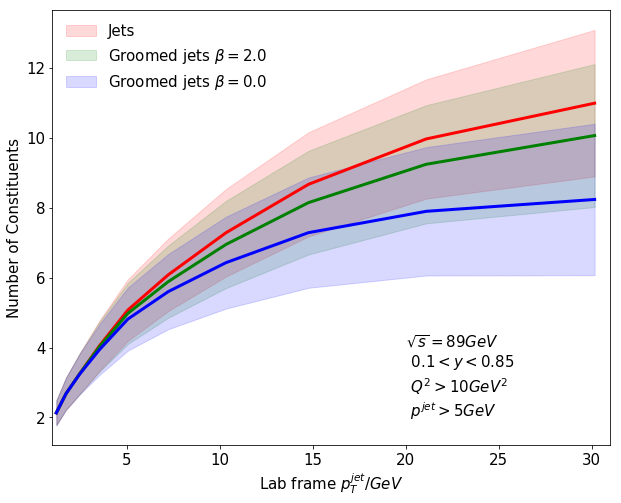

In [33]:
fig = plt.figure(figsize=(10,8))
x = []*(len(ptedges)-1)
y1 = []*(len(ptedges)-1)
y2 = []*(len(ptedges)-1)
y3 = []*(len(ptedges)-1)
yerr1 = []*(len(ptedges)-1)
yerr2 = []*(len(ptedges)-1)
yerr3 = []*(len(ptedges)-1)
for j in range(len(ptedges)-1):
    x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
    y1.append(np.mean(d1[0][j]['mult']))
    y2.append(np.mean(d1[0][j]['mult_g']))
    y3.append(np.mean(e1[0][j]['mult_g']))
    xerr = getInterval(ptedges)/2
    yerr1.append(np.std(d1[0][j]['mult'])/2)
    yerr2.append(np.std(d1[0][j]['mult_g'])/2)
    yerr3.append(np.std(e1[0][j]['mult_g'])/2)
plt.plot(x, y1, color='r',linewidth=3)
plt.plot(x, y2, color='g',linewidth=3)
plt.plot(x, y3, color='b',linewidth=3)
plt.fill_between(x, np.array(y1)+np.array(yerr1), np.array(y1)-np.array(yerr1), color='r', alpha=0.15, label='Jets')
plt.fill_between(x, np.array(y2)+np.array(yerr2), np.array(y2)-np.array(yerr2), color='g', alpha=0.15, label=r'Groomed jets $\beta = 2.0$')
plt.fill_between(x, np.array(y3)+np.array(yerr3), np.array(y3)-np.array(yerr3), color='b', alpha=0.15, label=r'Groomed jets $\beta = 0.0$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Lab frame $p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Constituents', fontsize=15)
plt.xlim(left=1,right=31)
plt.legend(prop={'size': 15}, frameon=False, loc='upper left')
plt.text(20, 2, '$\sqrt{s} = 89 GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 10 GeV^2$ \n $p^{jet} > 5 GeV$', fontsize=15)
plt.savefig('images/number_of_jet_constituents_for_jets_and_groomed_jets.pdf', bbox_inches='tight')